In [1]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [5]:
df = pd.read_excel("Online Retail.xlsx")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [11]:
df.dropna(subset=["CustomerID"], inplace=True)

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


In [14]:
df['Country'].value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

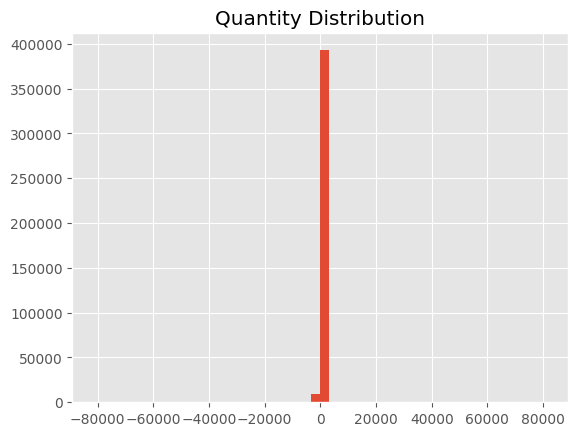

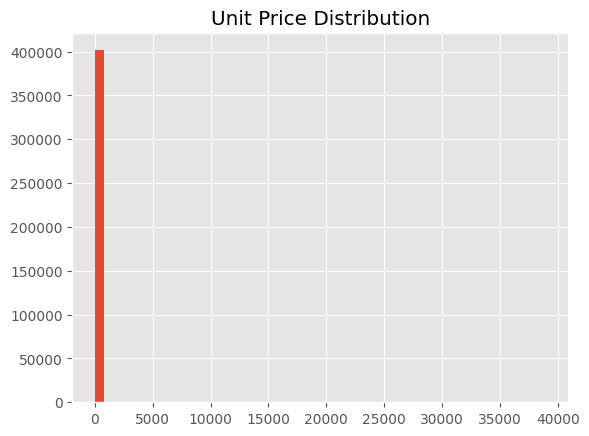

In [17]:
df['Quantity'].hist(bins=50)
plt.title("Quantity Distribution")
plt.show()

df['UnitPrice'].hist(bins=50)
plt.title("Unit Price Distribution")
plt.show()

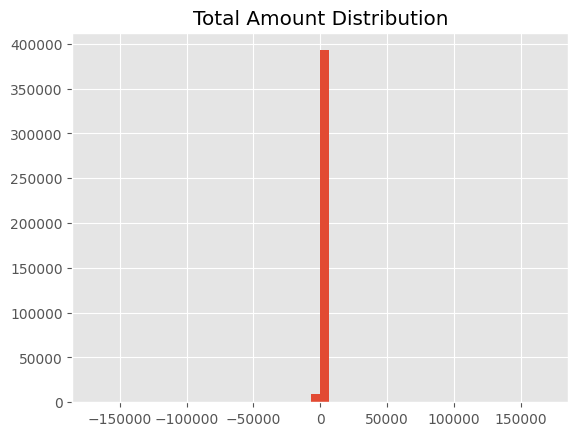

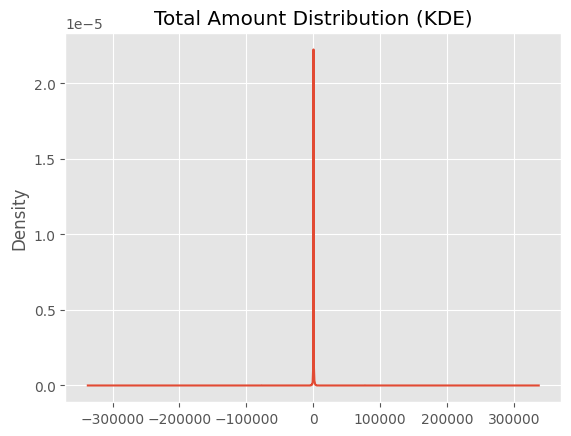

In [24]:
df['TotalAmount'].hist(bins=50)
plt.title("Total Amount Distribution")
plt.show()

df['TotalAmount'].plot(kind='kde')
plt.title("Total Amount Distribution (KDE)")
plt.show()

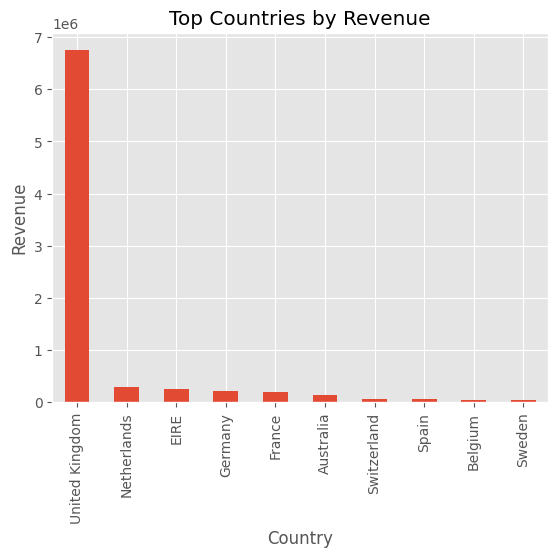

In [18]:
country_rev = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)[:10]
country_rev.plot(kind='bar')
plt.title("Top Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

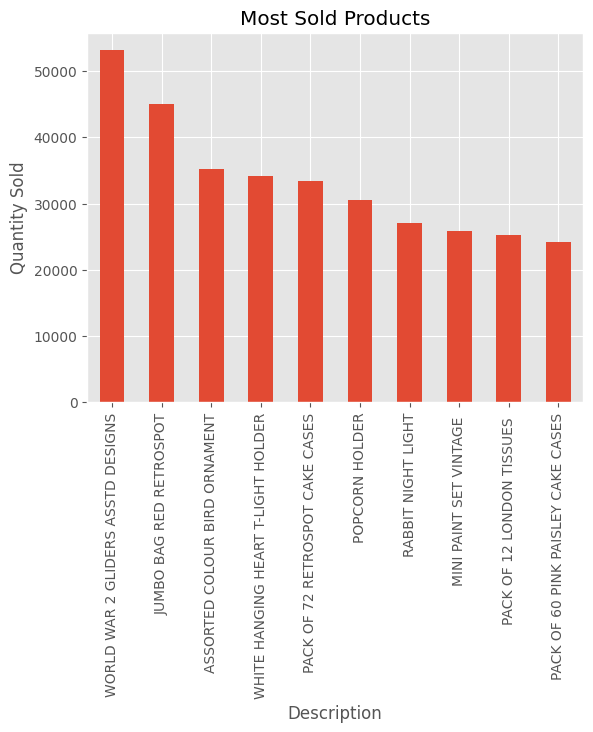

In [19]:
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[:10]
product_sales.plot(kind='bar')
plt.title("Most Sold Products")
plt.ylabel("Quantity Sold")
plt.show()

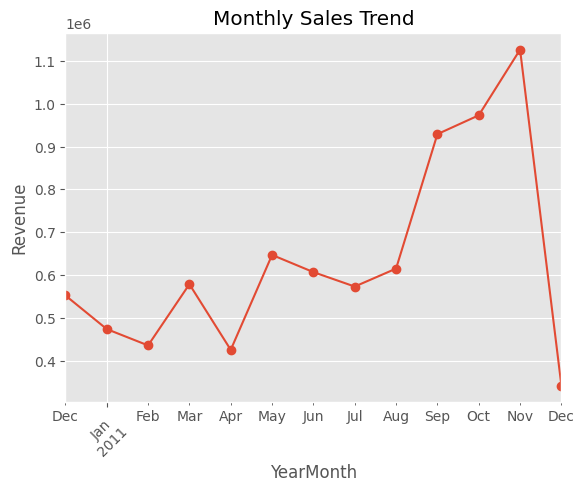

In [20]:
monthly_sales = df.groupby('YearMonth')['TotalAmount'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

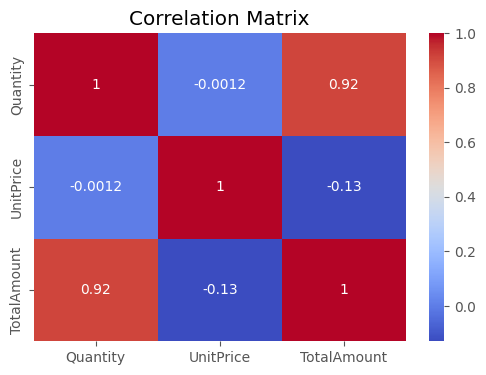

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
df.to_csv("online_retail_cleaned.csv", index=False)
files.download("online_retail_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>